In [1]:
# imports
import market_status as ms
from IPython.display import display
import datetime as dt
import os

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

## **World Markets**

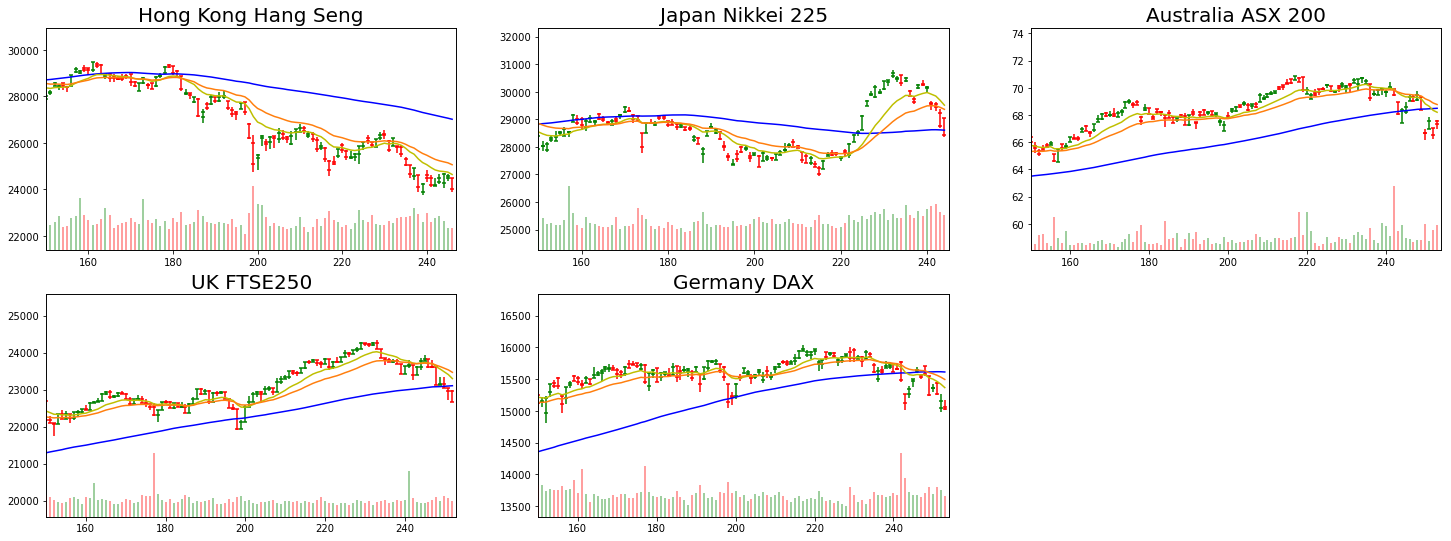

In [2]:
worldmarkets = ms.worldmarkets()
worldmarkets.show()

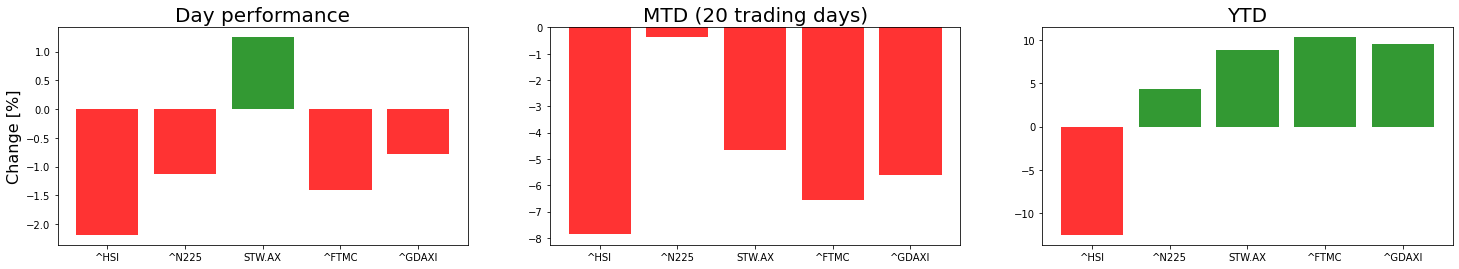

In [3]:
worldmarkets.performance()

***
## **American markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000 

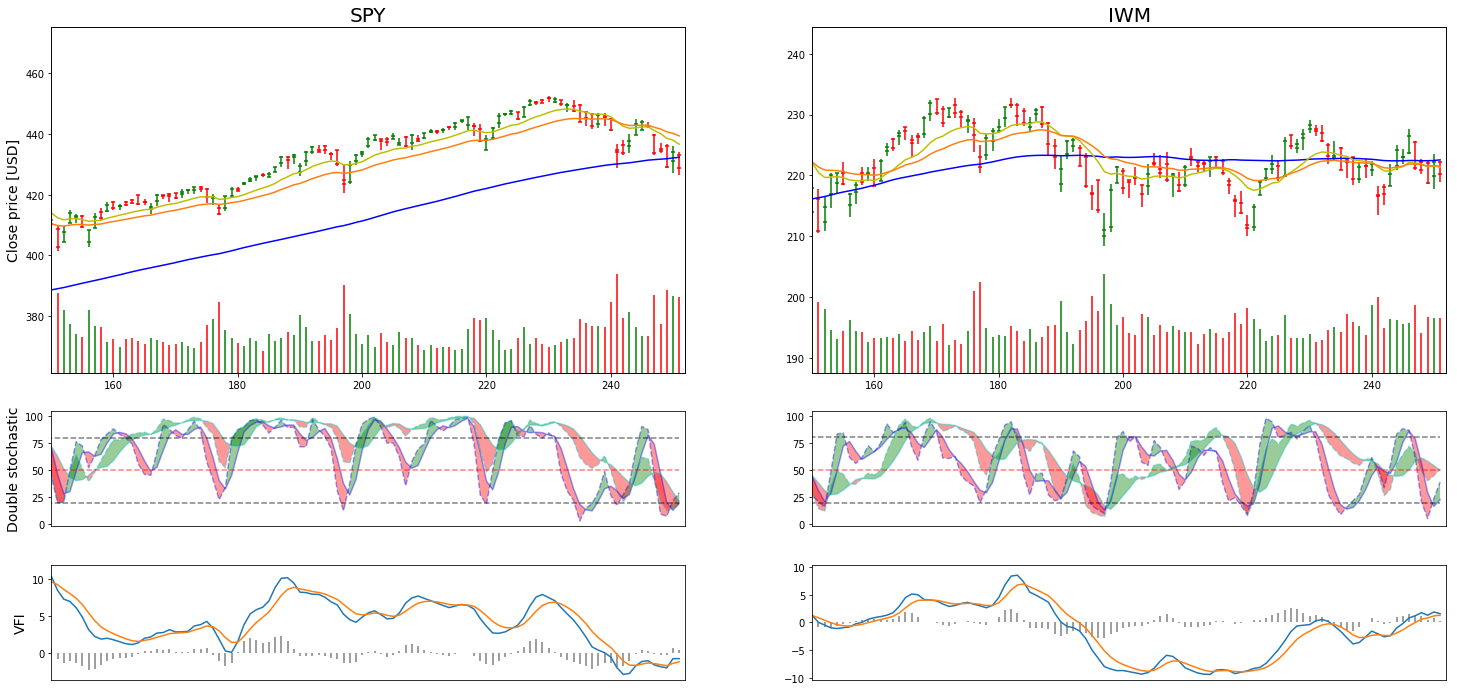

In [4]:
ms.show_usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

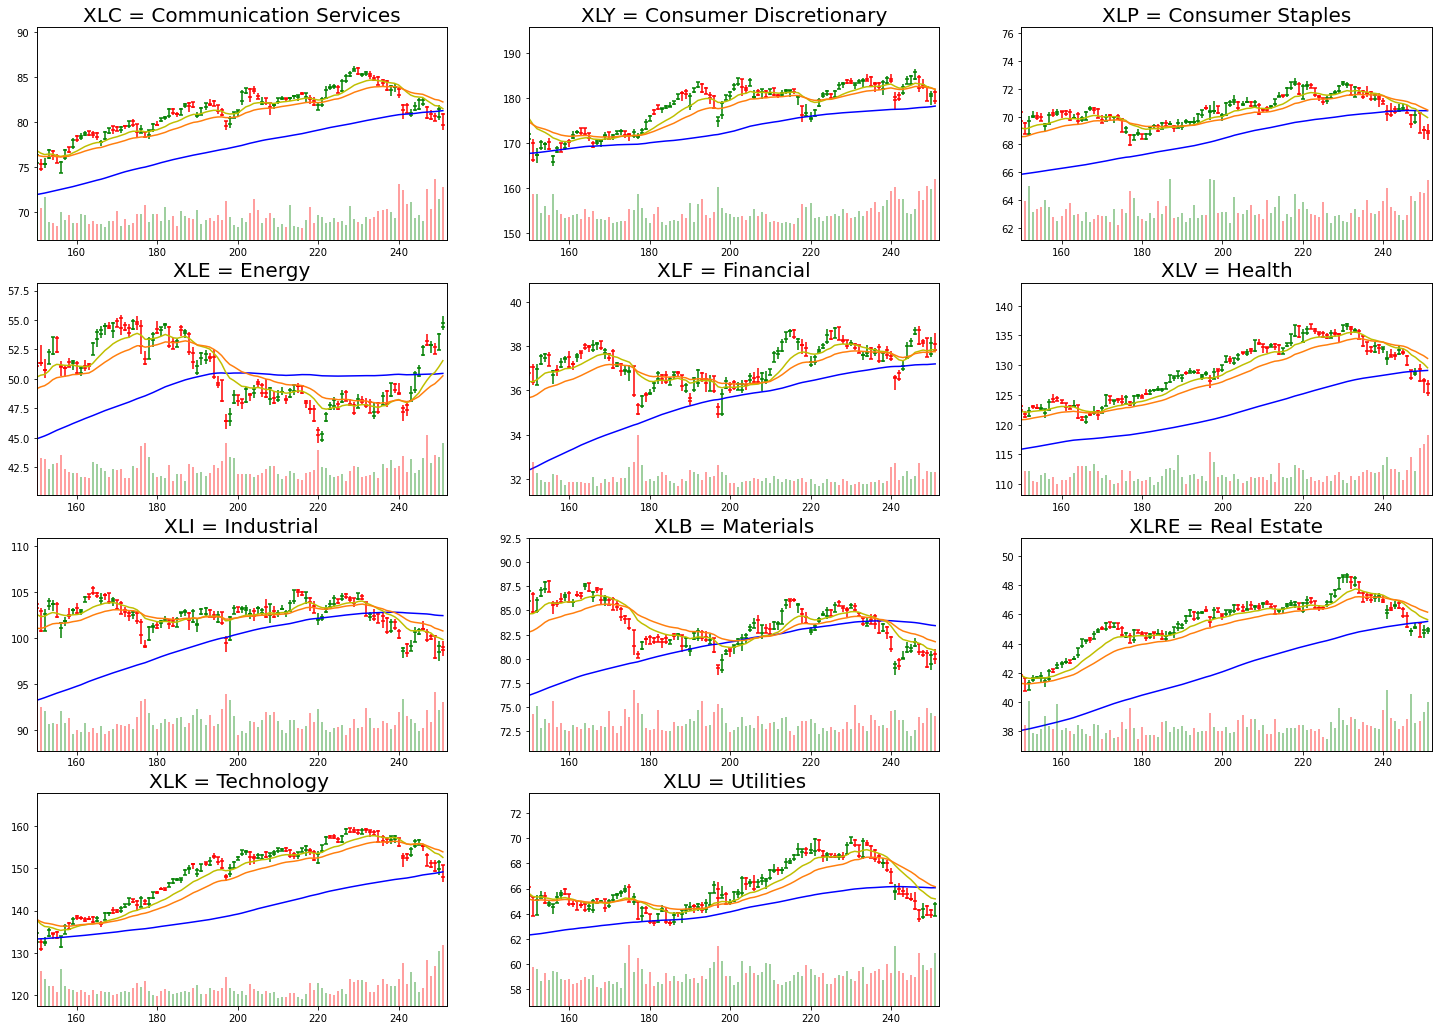

In [5]:
sectors = ms.sectors()
sectors.show()

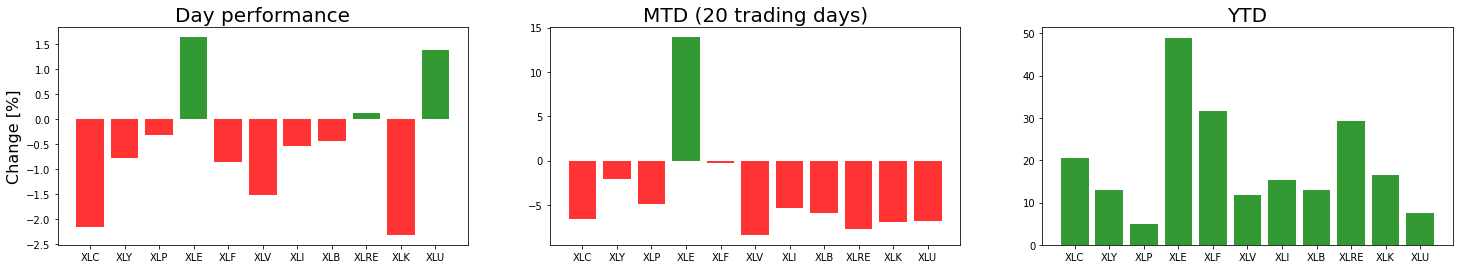

In [6]:
sectors.performance()

---

In [7]:
os.system('jupyter nbconvert --to html market_status.ipynb')


0

In [ ]:
# output information about SPY and IWM options 
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np

ticker = ["SPY", "IWM"]

data = yf.Ticker(ticker[0])

dates = pd.to_datetime(pd.Series(data.options, name="expiration"))

c = data.option_chain(dates[0].strftime("%Y-%m-%d")).calls["openInterest"].sum()
p = data.option_chain(dates[0].strftime("%Y-%m-%d")).puts["openInterest"].sum()
cv = data.option_chain(dates[0].strftime("%Y-%m-%d")).calls["volume"].sum()
pv = data.option_chain(dates[0].strftime("%Y-%m-%d")).calls["volume"].sum()
print(ticker[0] + ": expiration " + dates[0].strftime("%Y-%m-%d") + ", OI P/C ratio: " + str(np.round(p/c, 2)) + ", Volume P/C ratio: " + str(np.round(pv/cv, 2)))
